In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [54]:
country = pd.read_csv("../dataset/country.csv")
league = pd.read_csv("../dataset/league.csv")
match = pd.read_csv("../dataset/match.csv")
player = pd.read_csv("../dataset/player.csv")
player_attributes = pd.read_csv("../dataset/player_attributes.csv")
team = pd.read_csv("../dataset/team.csv", encoding = "ISO-8859-1")
team_attributes = pd.read_csv("../dataset/team_attributes.csv")

In [55]:
homedogswin = pd.read_csv("../groupscores/homedogswin.csv", index_col = 0)
awaydogswin = pd.read_csv("../groupscores/awaydogswin.csv", index_col = 0 )
match1 = pd.read_csv("../groupscores/match1.csv", index_col = 0)

In [56]:
homedogswin

,wins,games,dogscore
home_team_id,,,
1773,3,11,0.272727
2033,1,24,0.041667
4049,2,8,0.250000
4087,2,14,0.142857
6269,2,6,0.333333
...,...,...,...
10281,4,12,0.333333
108893,1,13,0.076923
158085,2,12,0.166667


# which are the teams with the highest dog score


In [57]:
# find dog teams with score > 0.4, much higher than predicted probability (<1/3.5)
benchmark = .4
high_dog_home = homedogswin.sort_values(by = "dogscore", ascending = False)[homedogswin.dogscore >= benchmark]
high_dog_away = awaydogswin.sort_values(by = "dogscore", ascending = False)[awaydogswin.dogscore >= benchmark]

D:\softwares\anaconda\envs\data science\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\softwares\anaconda\envs\data science\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [58]:
team_names_home = high_dog_home.index
team_names_away = high_dog_away.index
team_names = team_names_home.append(team_names_away).drop_duplicates()
team_names

Int64Index([  9748,   8548,   8573,   8586,   8295,   8650,   6391,  10229,
              8560,   9875,   8636,   8203,   8668,   9873, 274581,   9905,
              9790,   8398,   8635,   9925,   8593,   8262,   8640],
           dtype='int64')

# Analyse attributes of these teams

In [170]:
attributes = team_attributes[team_attributes.team_id.isin(team_names)]
attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 33 to 1318
Data columns (total 24 columns):
team_id                           118 non-null int64
date                              118 non-null object
buildUpPlaySpeed                  118 non-null int64
buildUpPlaySpeedClass             118 non-null int64
buildUpPlayDribbling              42 non-null float64
buildUpPlayDribblingClass         118 non-null int64
buildUpPlayPassing                118 non-null int64
buildUpPlayPassingClass           118 non-null int64
buildUpPlayPositioningClass       118 non-null int64
chanceCreationPassing             118 non-null int64
chanceCreationPassingClass        118 non-null int64
chanceCreationCrossing            118 non-null int64
chanceCreationCrossingClass       118 non-null int64
chanceCreationShooting            118 non-null int64
chanceCreationShootingClass       118 non-null int64
chanceCreationPositioningClass    118 non-null int64
defencePressure                   118 non-n

In [171]:
team_attributes["is_high_dog"]= attributes.team_id.isin(team_names)

In [172]:
num_col = ['buildUpPlaySpeed', 
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth']
cat_col = ['buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass',
           'chanceCreationCrossingClass', 'chanceCreationShootingClass' ,'chanceCreationPositioningClass', 'defencePressureClass', 
           'defenceAggressionClass', 'defenceTeamWidthClass', 'defenceDefenderLineClass']

## Numerical features

In [173]:
high_num_mean = []
all_num_mean = []
for i in num_col:
    high_num_mean.append(attributes[i].mean())
    all_num_mean.append(team_attributes[i].mean())
num_mean = pd.DataFrame(num_col, columns = ["attributes"])
num_mean["high_dog_mean"] = high_num_mean
num_mean["all_mean"] = all_num_mean
num_mean

,attributes,high_dog_mean,all_mean
0,buildUpPlaySpeed,53.093220,52.462277
1,buildUpPlayPassing,47.118644,48.490398
2,chanceCreationPassing,52.864407,52.165295
3,chanceCreationCrossing,55.813559,53.731824
4,chanceCreationShooting,56.694915,53.969136
5,defencePressure,49.610169,46.017147
6,defenceAggression,52.135593,49.251029
7,defenceTeamWidth,53.483051,52.185871


Finding: Dogs are likely to have higher buildUpPlayDribbling, chanceCreationCrossing, chanceCreationShooting, defencePressure, defenceAggression, defenceTeamWidth 
Can possibly undertake hypothesis testing on these.

In [187]:
num_features_all = pd.melt(team_attributes[num_col])
num_features_highdogs = pd.melt(attributes[num_col])
df = pd.concat([num_features_all, num_features_highdogs],keys = ["all","high-dogs"])
df = df.reset_index()
df = df.drop(["level_1"], axis =1)
df = df.rename({"level_0": "category"}, axis =1)

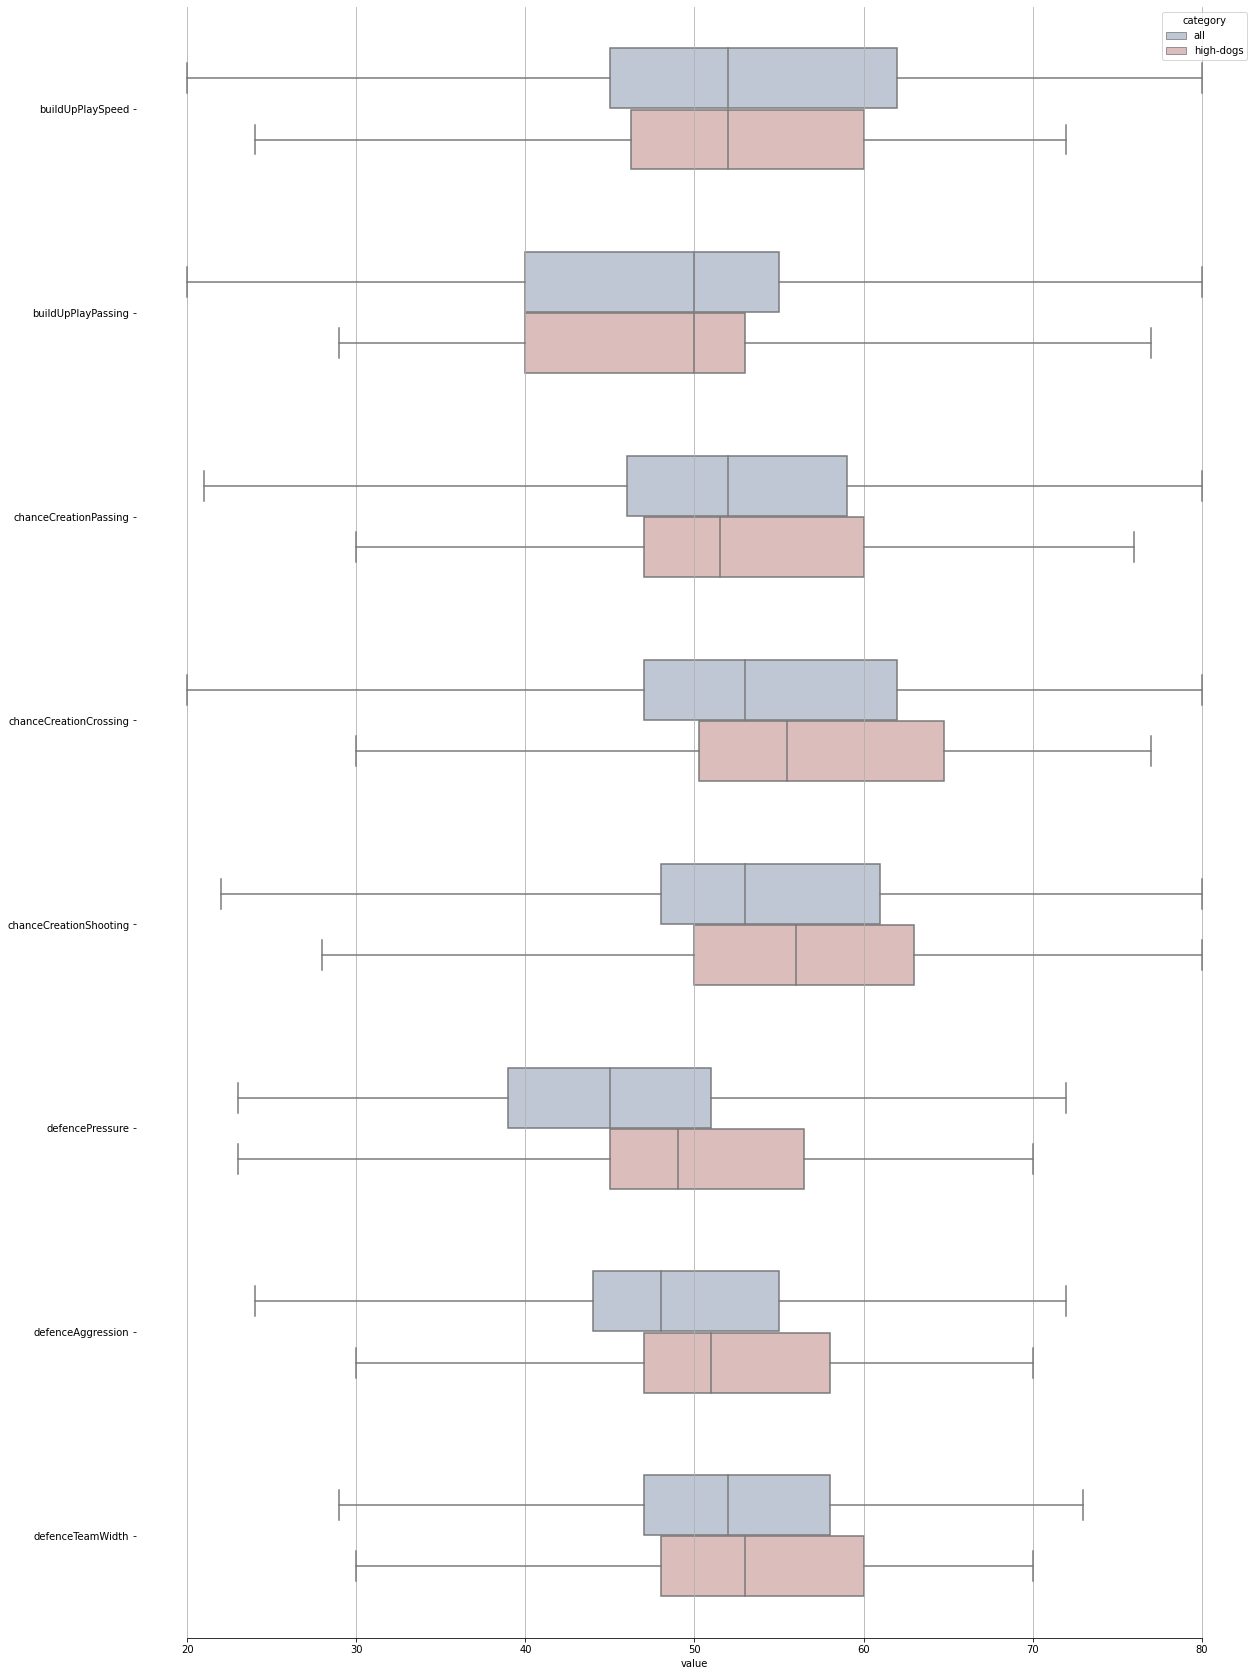

In [188]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20, 30))

# Plot the orbital period with horizontal boxes
sns.boxplot(y="variable", x="value", hue = "category", data = df,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
# sns.stripplot(x="variable", y="value", data=df,
#              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

## Categorical features

In [124]:
labelencoder = LabelEncoder()
high_cat_mean = []
all_cat_mean = []

for i in cat_col:
    attributes[i]= labelencoder.fit_transform(attributes[i])
    team_attributes[i]= labelencoder.fit_transform(team_attributes[i])
    mean1 = attributes[i].mean()
    mean2 = team_attributes[i].mean()
    high_cat_mean.append(mean1)
    all_cat_mean.append(mean2)

cat_mean = pd.DataFrame(cat_col, columns = ["attributes"])
cat_mean["high_dog_mean"] = high_cat_mean
cat_mean["all_mean"] = all_cat_mean
cat_mean

D:\softwares\anaconda\envs\data science\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,attributes,high_dog_mean,all_mean
0,buildUpPlaySpeedClass,0.245763,0.257888
1,buildUpPlayDribblingClass,0.686441,0.608368
2,buildUpPlayPassingClass,1.067797,1.023320
3,buildUpPlayPositioningClass,0.915254,0.950617
4,chanceCreationPassingClass,0.211864,0.194102
5,chanceCreationCrossingClass,1.788136,1.783951
6,chanceCreationShootingClass,1.745763,1.814129
7,chanceCreationPositioningClass,0.915254,0.897805
8,defencePressureClass,1.805085,1.746914
9,defenceAggressionClass,1.830508,1.815501


In [191]:
cat_features_all = team_attributes[cat_col]
cat_features_highdogs = attributes[cat_col]
df = pd.concat([pd.melt(cat_features_all),pd.melt(cat_features_highdogs)],keys = ["all","high-dogs"])
df = df.reset_index()
df = df.drop(["level_1"], axis =1)
df = df.rename({"level_0": "category"}, axis =1)

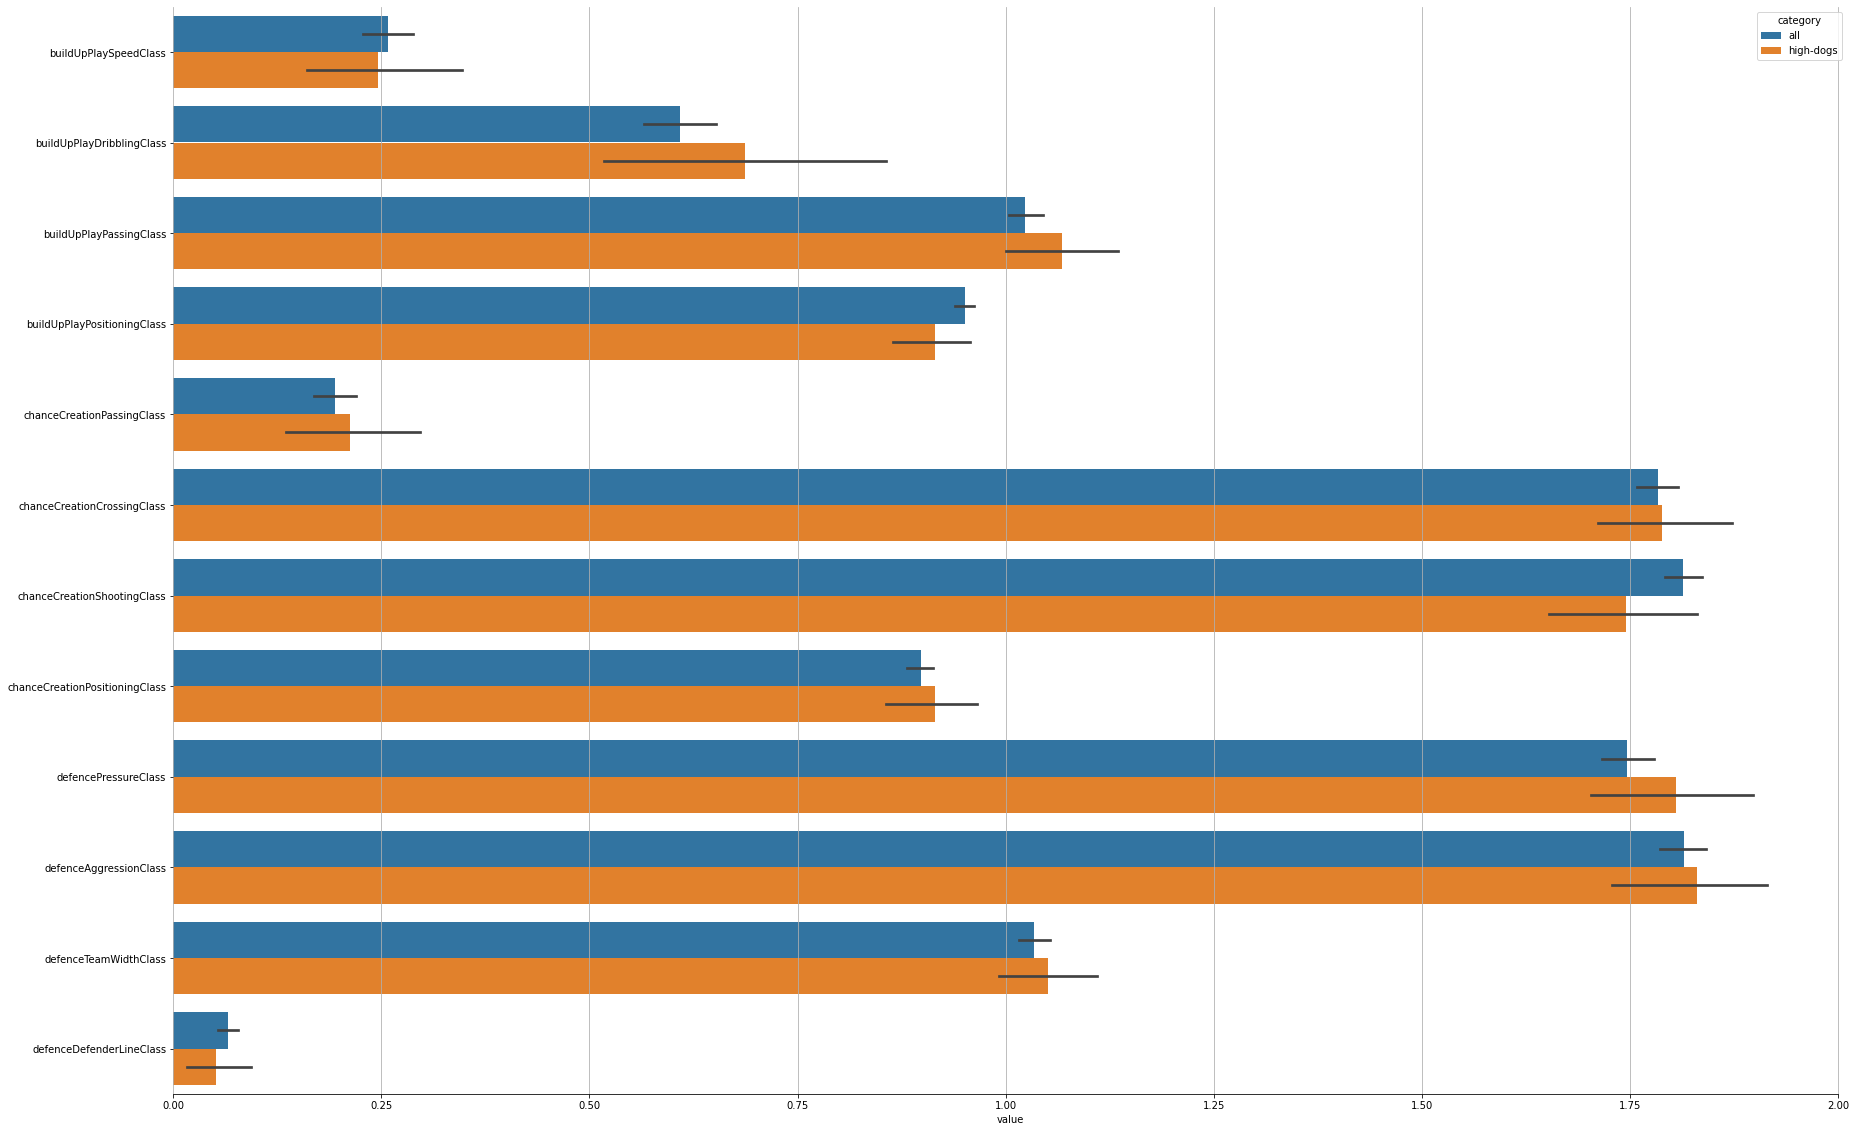

In [195]:
#sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(30, 20))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.barplot(y="variable", x="value", hue = "category", data = df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)